<a href="https://colab.research.google.com/github/Gulwalishah/CLT/blob/main/Copy_of_MNIST_HM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  #Imports

In [ ]:
#!pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns
np.random.seed(0)

# Data_set

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test)= mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


#Visualing data set

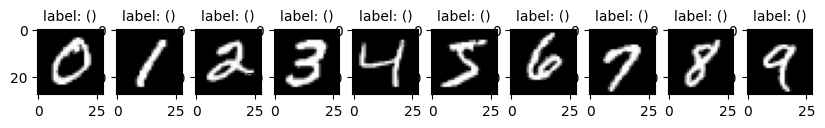

In [ ]:
sample_classes=10
f, ax = plt.subplots (1, sample_classes, figsize=(10,10))
for i in range(0, sample_classes):
  sample_img= x_train[y_train==i][0]
  ax[i].imshow(sample_img, cmap='gray')
  ax[i].set_title('label: ()'.format(i), fontsize=10)


In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare_Data

In [ ]:
#Normalize tha data
x_train=x_train/255
x_test=x_test/255

In [ ]:
#Reshape_data
#x_train[0].shape

In [ ]:
x_train=x_train.reshape(x_train.shape[0], -1)
x_test=x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


In [ ]:
# Fullly connected Neural network_Create_Model
model=Sequential()
model.add(Dense(units=128, input_dim=784, activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train_Model


In [ ]:
batch_size=512
epoch=10
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9847 - loss: 0.0491
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9876 - loss: 0.0403
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9883 - loss: 0.0374
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9897 - loss: 0.0340
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9919 - loss: 0.0268
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9920 - loss: 0.0261
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9928 - loss: 0.0236
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9934 - loss: 0.0216
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9953 - loss: 0.0173
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9950 - loss: 0.0186
